In [23]:
import pandas as pd
from pandas import DataFrame
from numpy import array
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from numpy import ndarray
import math
from keras.losses import SparseCategoricalCrossentropy

In [24]:
n_steps = 3 # Amount of time steps used during lookback
n_verify = 40 # Train test split in percentages
test_range = 500


Data preparations

In [25]:
df = pd.read_csv('datapoints.csv')
df['timestamp'] = pd.to_datetime(df.pop('timestamp'), format='%Y-%m-%d %H:%M:%S')
df.sort_values(by='timestamp')

mask = df.name.str.contains("BLOK61")
df_blok = df[mask]
df_videolab = df[~mask]
df_blok_filtered = df_blok["value"].to_numpy()

In [26]:
# Splits univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
        

In [27]:
X, y = split_sequence(df_blok_filtered, n_steps)
split_index = math.ceil(X.shape[0]/100*(100-n_verify))
x_train, x_verify = X[:split_index], X[split_index:]
y_train, y_verify = y[:split_index], X[split_index:]

In [28]:
n_features = 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], n_features)
x_verify = x_verify.reshape(x_verify.shape[0], x_verify.shape[1], n_features)

In [29]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='msle')
model.fit(x_train, y_train, epochs=250, verbose=1)

oss: 0.0563
Epoch 12/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0565
Epoch 13/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0565
Epoch 14/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0562
Epoch 15/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0562
Epoch 16/250
731/731 [==============================] - 2s 3ms/step - loss: 0.0562
Epoch 17/250
731/731 [==============================] - 2s 3ms/step - loss: 0.0562
Epoch 18/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0561
Epoch 19/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0560
Epoch 20/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0560
Epoch 21/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0559
Epoch 22/250
731/731 [==============================] - 2s 2ms/step - loss: 0.0561
Epoch 23/250
731/731 [==============================] - 2s 2ms/step - loss:

from -500 till -497
from -499 till -496
from -498 till -495
from -497 till -494
from -496 till -493
from -495 till -492
from -494 till -491
from -493 till -490
from -492 till -489
from -491 till -488
from -490 till -487
from -489 till -486
from -488 till -485
from -487 till -484
from -486 till -483
from -485 till -482
from -484 till -481
from -483 till -480
from -482 till -479
from -481 till -478
from -480 till -477
from -479 till -476
from -478 till -475
from -477 till -474
from -476 till -473
from -475 till -472
from -474 till -471
from -473 till -470
from -472 till -469
from -471 till -468
from -470 till -467
from -469 till -466
from -468 till -465
from -467 till -464
from -466 till -463
from -465 till -462
from -464 till -461
from -463 till -460
from -462 till -459
from -461 till -458
from -460 till -457
from -459 till -456
from -458 till -455
from -457 till -454
from -456 till -453
from -455 till -452
from -454 till -451
from -453 till -450
from -452 till -449
from -451 till -448


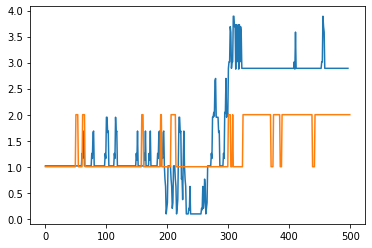

In [31]:
x_input = array([1,1,2])
x_input = x_input.reshape((1, n_steps, n_features))

real = df_blok_filtered[-test_range:]
predictions = []


for i in range(test_range-n_steps):
    print("from %s till %s" % (-test_range+i, -test_range+i+n_steps))
    x_in = df_blok_filtered[-test_range-i:-test_range-i+n_steps]
    x_input = x_in.reshape((1, n_steps, n_features))
    predictions.append(model.predict(x_input, verbose=0)[0][0])



plt.plot(predictions)
plt.plot(real)

In [16]:
model.evaluate(x_verify, y_verify)

487/487 [==============================] - 0s 687us/step - loss: 1.2056


1.205579400062561